## FDA - GROUP2
### Customer Segmentation using RFM Analysis

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
pio.templates.default = "plotly_white"

#1. Data Preprocessing :

In [ ]:
!pip install gdown


In [ ]:
import gdown

file_id = '1LS9-t69iEUhJKxSYYy7S2Iyf3xVwUSFR'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'df.csv'

gdown.download(url, output, quiet=False)

import pandas as pd
df = pd.read_csv(output, encoding='ISO-8859-1')


Downloading...
From: https://drive.google.com/uc?id=1LS9-t69iEUhJKxSYYy7S2Iyf3xVwUSFR
To: /content/df.csv
100%|██████████| 45.6M/45.6M [00:00<00:00, 191MB/s]


In [ ]:
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


In [ ]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
negative_rows_index = df[(df['Quantity'] < 0) | (df['UnitPrice'] < 0)].index
negative_rows = df[(df['Quantity'] < 0) | (df['UnitPrice'] < 0)]

negative_rows.head()



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom


In [ ]:
df.drop(negative_rows_index, inplace=True)


In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description       592
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133359
Country             0
dtype: int64

In [ ]:
Description_mode = df['Description'].mode()[0]

df['Description'].fillna(Description_mode, inplace=True)

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')
df['InvoiceDate1'] = df['InvoiceDate']
df['InvoiceDate1'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
df['CustomerID'].value_counts()

17841.0    7847
14911.0    5677
14096.0    5111
12748.0    4596
14606.0    2700
           ... 
15313.0       1
17846.0       1
13185.0       1
16953.0       1
16737.0       1
Name: CustomerID, Length: 4339, dtype: int64

In [ ]:
df.dropna(subset=['CustomerID'], inplace=True)

In [ ]:
df.isnull().sum()

InvoiceNo       0
StockCode       0
Description     0
Quantity        0
InvoiceDate     0
UnitPrice       0
CustomerID      0
Country         0
InvoiceDate1    0
dtype: int64

In [ ]:
df['CustomerID'] = df['CustomerID'].astype(int)

In [ ]:
df['InvoiceNo'].value_counts()

576339    542
579196    533
580727    529
578270    442
573576    435
         ... 
561657      1
546775      1
546827      1
546828      1
565975      1
Name: InvoiceNo, Length: 18536, dtype: int64

In [ ]:
df['CustomerID'].value_counts()

17841    7847
14911    5677
14096    5111
12748    4596
14606    2700
         ... 
15313       1
17846       1
13185       1
16953       1
16737       1
Name: CustomerID, Length: 4339, dtype: int64

In [ ]:
df['EffectivePrice'] = df['Quantity']*df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate1,EffectivePrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12-01 08:26:00,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01 08:26:00,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12-01 08:26:00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01 08:26:00,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01 08:26:00,20.34


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   InvoiceNo       397924 non-null  object        
 1   StockCode       397924 non-null  object        
 2   Description     397924 non-null  object        
 3   Quantity        397924 non-null  int64         
 4   InvoiceDate     397924 non-null  datetime64[ns]
 5   UnitPrice       397924 non-null  float64       
 6   CustomerID      397924 non-null  int64         
 7   Country         397924 non-null  object        
 8   InvoiceDate1    397924 non-null  datetime64[ns]
 9   EffectivePrice  397924 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 33.4+ MB


In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

orders_df = df.groupby('InvoiceNo').agg({
    'InvoiceDate': 'first',
    'CustomerID': 'first',
    'Country': 'first',
    'Quantity': 'sum',
    'EffectivePrice': 'sum'
}).reset_index()

orders_df.head()


,InvoiceNo,InvoiceDate,CustomerID,Country,Quantity,EffectivePrice
0,536365,2010-12-01 08:26:00,17850,United Kingdom,40,139.12
1,536366,2010-12-01 08:28:00,17850,United Kingdom,12,22.20
2,536367,2010-12-01 08:34:00,13047,United Kingdom,83,278.73
3,536368,2010-12-01 08:34:00,13047,United Kingdom,15,70.05
4,536369,2010-12-01 08:35:00,13047,United Kingdom,3,17.85


#**2**. RFM Calculation:

In [ ]:
orders_df['InvoiceDate'] = pd.to_datetime(orders_df['InvoiceDate'])

current_date = max(orders_df['InvoiceDate'])
rfm_df = orders_df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (current_date - x.max()).days,
    'InvoiceNo': 'count',
    'EffectivePrice': 'sum'
})
rfm_df.columns = ['Recency', 'Frequency', 'Monetary']

rfm_df.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346,325,1,77183.60
12347,1,7,4310.00
12348,74,4,1797.24
12349,18,1,1757.55
12350,309,1,334.40


#3. RFM Segmentation:

In [ ]:
quartiles = rfm_df.quantile(q=[0.25, 0.5, 0.75])

def rfm_score(x, metric, quartiles):
    if x <= quartiles[metric][0.25]:
        return 1
    elif x <= quartiles[metric][0.50]:
        return 2
    elif x <= quartiles[metric][0.75]:
        return 3
    else:
        return 4


rfm_df['RecencyScore'] = rfm_df['Recency'].apply(rfm_score, args=('Recency', quartiles))
rfm_df['FrequencyScore'] = rfm_df['Frequency'].apply(rfm_score, args=('Frequency', quartiles))
rfm_df['MonetaryScore'] = rfm_df['Monetary'].apply(rfm_score, args=('Monetary', quartiles))



rfm_df.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore
CustomerID,,,,,,
12346,325,1,77183.60,4,1,4
12347,1,7,4310.00,1,4,4
12348,74,4,1797.24,3,3,4
12349,18,1,1757.55,2,1,4
12350,309,1,334.40,4,1,2


In [ ]:
rfm_df['RFM_Score'] = rfm_df['RecencyScore'] * 100 + rfm_df['FrequencyScore'] * 10 + rfm_df['MonetaryScore']

rfm_df.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score
CustomerID,,,,,,,
12346,325,1,77183.60,4,1,4,414
12347,1,7,4310.00,1,4,4,144
12348,74,4,1797.24,3,3,4,334
12349,18,1,1757.55,2,1,4,214
12350,309,1,334.40,4,1,2,412


#4. Customer Segmentation

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

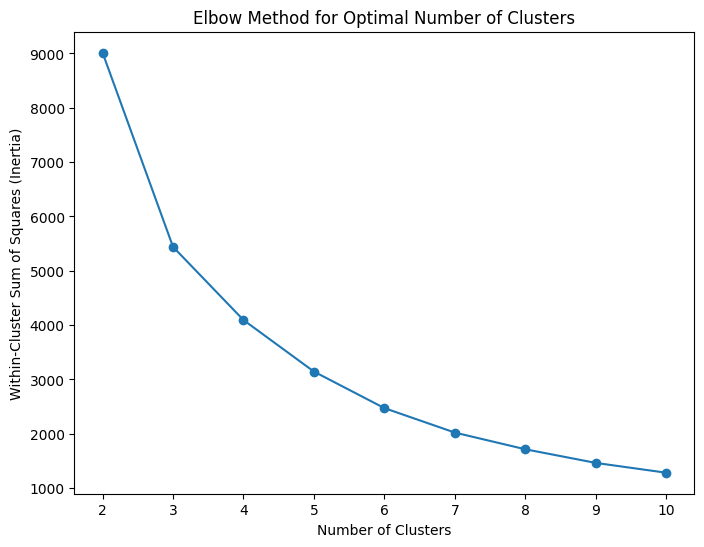

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
!pip install scikit-learn


scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df[['Recency', 'Frequency', 'Monetary']])


cluster_range = range(2, 11)
cluster_inertia = []

for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(rfm_scaled)
    cluster_inertia.append(kmeans.inertia_)


plt.figure(figsize=(8, 6))
plt.plot(cluster_range, cluster_inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.show()

optimal_clusters = 3

kmeans_final = KMeans(n_clusters=optimal_clusters, random_state=42)
rfm_df['Cluster'] = kmeans_final.fit_predict(rfm_scaled)




In [ ]:
rfm_df['Cluster'].value_counts()

0    3231
1    1082
2      26
Name: Cluster, dtype: int64

In [ ]:

cluster_names = {0: 'Basic', 1: 'Frequent', 2: 'Premium'}

rfm_df['ClusterName'] = rfm_df['Cluster'].map(cluster_names)

rfm_df[['RFM_Score', 'Cluster', 'ClusterName']].head(10)


,RFM_Score,Cluster,ClusterName
CustomerID,,,
12346,414,1,Frequent
12347,144,0,Basic
12348,334,0,Basic
12349,214,0,Basic
12350,412,1,Frequent
12352,244,0,Basic
12353,411,1,Frequent
12354,413,1,Frequent
12355,412,1,Frequent


In [ ]:
rfm_df.head(10)

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,Cluster,ClusterName
CustomerID,,,,,,,,,
12346,325,1,77183.60,4,1,4,414,1,Frequent
12347,1,7,4310.00,1,4,4,144,0,Basic
12348,74,4,1797.24,3,3,4,334,0,Basic
12349,18,1,1757.55,2,1,4,214,0,Basic
12350,309,1,334.40,4,1,2,412,1,Frequent
12352,35,8,2506.04,2,4,4,244,0,Basic
12353,203,1,89.00,4,1,1,411,1,Frequent
12354,231,1,1079.40,4,1,3,413,1,Frequent
12355,213,1,459.40,4,1,2,412,1,Frequent


In [ ]:
silhouette_avg = silhouette_score(rfm_scaled, rfm_df['Cluster'])
print(f'Silhouette Score for {optimal_clusters} clusters: {silhouette_avg}')

Silhouette Score for 3 clusters: 0.5943372749085692


#*5*. Segment Profiling

In [ ]:
rfm_df[rfm_df['ClusterName']=='Premium'].head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,Cluster,ClusterName
CustomerID,,,,,,,,,
12415,23,21,124914.53,2,4,4,244,2,Premium
12748,0,210,33719.73,1,4,4,144,2,Premium
12971,3,86,11189.91,1,4,4,144,2,Premium
13089,2,97,58825.83,1,4,4,144,2,Premium
13408,1,62,28117.04,1,4,4,144,2,Premium


In [ ]:
rfm_df[rfm_df['ClusterName']=='Basic'].head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,Cluster,ClusterName
CustomerID,,,,,,,,,
12347,1,7,4310.00,1,4,4,144,0,Basic
12348,74,4,1797.24,3,3,4,334,0,Basic
12349,18,1,1757.55,2,1,4,214,0,Basic
12352,35,8,2506.04,2,4,4,244,0,Basic
12356,22,3,2811.43,2,3,4,234,0,Basic


In [ ]:
rfm_df[rfm_df['ClusterName']=='Frequent'].head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,Cluster,ClusterName
CustomerID,,,,,,,,,
12346,325,1,77183.6,4,1,4,414,1,Frequent
12350,309,1,334.4,4,1,2,412,1,Frequent
12353,203,1,89.0,4,1,1,411,1,Frequent
12354,231,1,1079.4,4,1,3,413,1,Frequent
12355,213,1,459.4,4,1,2,412,1,Frequent


In [ ]:
group_stat = rfm_df.groupby('ClusterName')[['RecencyScore', 'FrequencyScore', 'MonetaryScore']].mean()
group_stat.head()

,RecencyScore,FrequencyScore,MonetaryScore
ClusterName,,,
Basic,1.992572,2.593005,2.744042
Frequent,3.992606,1.465804,1.734750
Premium,1.076923,3.923077,4.000000


Text(0.5, 1.0, 'RFM Value segment distribution')

<Figure size 300x400 with 0 Axes>

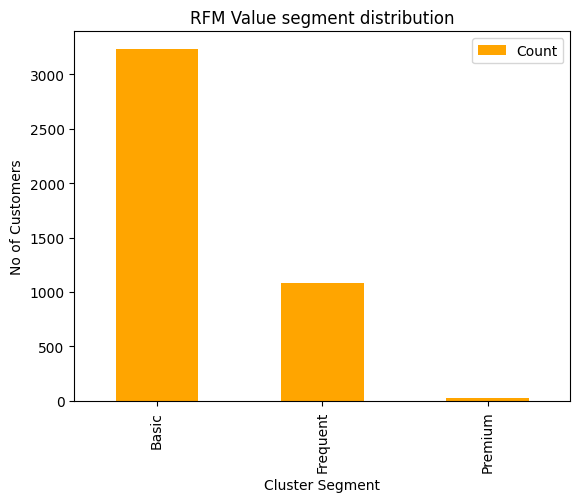

In [ ]:
segment_stats = rfm_df['ClusterName'].value_counts().reset_index()
segment_stats.columns = ['ClusterName', 'Count']
plt.figure(figsize=(3,4))

segment_stats.plot.bar(x='ClusterName', y='Count', color='orange')

plt.xlabel('Cluster Segment')
plt.ylabel('No of Customers')
plt.title('RFM Value segment distribution')

In [ ]:
cluster_profiles = rfm_df.groupby('ClusterName').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'RecencyScore': 'mean',
    'FrequencyScore': 'mean',
    'MonetaryScore': 'mean',
    'RFM_Score': 'mean',
    'Cluster': 'size'
}).rename(columns={'Cluster': 'CustomerCount'})

# Display the customer profiles for each unique ClusterName
for cluster_name, profile in cluster_profiles.iterrows():
    print(f"\nProfile for ClusterName {cluster_name}:\n{'=' * 25}")
    print(profile)



Profile for ClusterName Basic:
Recency             40.445682
Frequency            4.671928
Monetary          1855.367927
RecencyScore         1.992572
FrequencyScore       2.593005
MonetaryScore        2.744042
RFM_Score          227.931291
CustomerCount     3231.000000
Name: Basic, dtype: float64

Profile for ClusterName Frequent:
Recency            246.106285
Frequency            1.582255
Monetary           631.424206
RecencyScore         3.992606
FrequencyScore       1.465804
MonetaryScore        1.734750
RFM_Score          415.653420
CustomerCount     1082.000000
Name: Frequent, dtype: float64

Profile for ClusterName Premium:
Recency               5.038462
Frequency            66.500000
Monetary          85904.351538
RecencyScore          1.076923
FrequencyScore        3.923077
MonetaryScore         4.000000
RFM_Score           150.923077
CustomerCount        26.000000
Name: Premium, dtype: float64


In [ ]:
print(rfm_df.columns)

Index(['Recency', 'Frequency', 'Monetary', 'RecencyScore', 'FrequencyScore',
       'MonetaryScore', 'RFM_Score', 'Cluster', 'ClusterName'],
      dtype='object')


#6. Marketing Recommendations

**Basic Segment:**

    Customer Profile:
        Moderate recency, frequency, and monetary values.

    Marketing Recommendations:
        Run targeted promotions with discounts on popular products to encourage repeat purchases.
        Introduce a loyalty program with tiered rewards to incentivize customers to increase their frequency.
        Send personalized emails highlighting affordable product ranges and exclusive offers.

**Frequent Segment:**

    Customer Profile:
        Recent purchases, frequent transactions, and moderate monetary value.

    Marketing Recommendations:
        Provide exclusive early access to new product arrivals or limited-time promotions to maintain engagement.
        Implement a tiered loyalty program with special benefits for frequent shoppers.
        Send personalized recommendations based on their purchase history to reinforce their loyalty.

**Premium Segment:**

    Customer Profile:
        High recency, frequency, and monetary values.

    Marketing Recommendations:
        Launch exclusive VIP programs with premium services, personalized experiences, and early access to sales.
        Offer high-end products or limited-edition items with special discounts for premium customers.
        Engage in personalized communication through VIP newsletters or dedicated account managers.



#7. Visualization

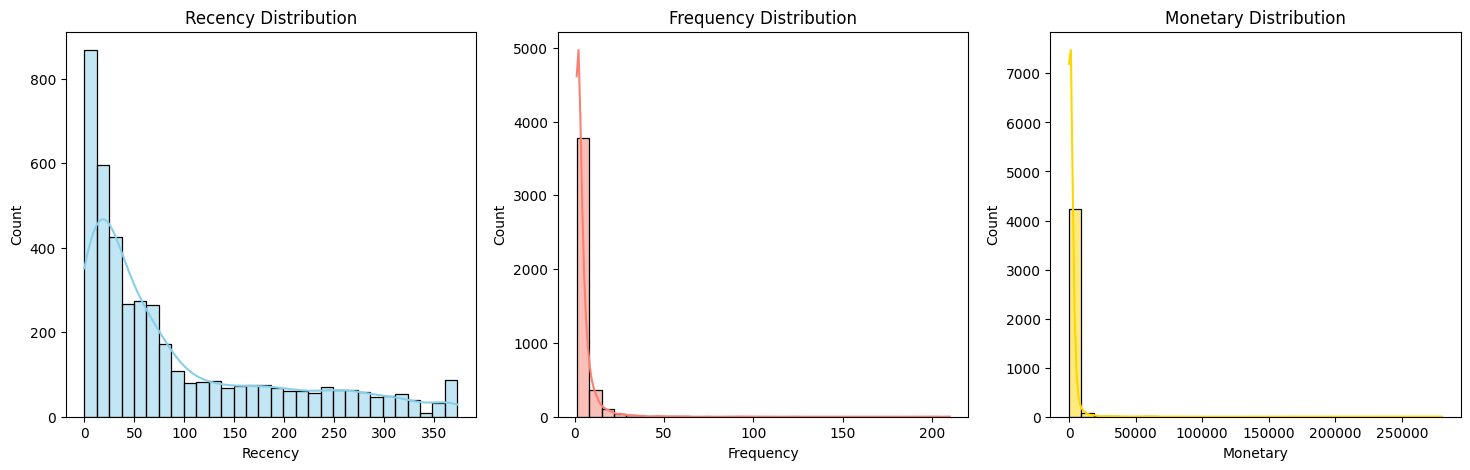

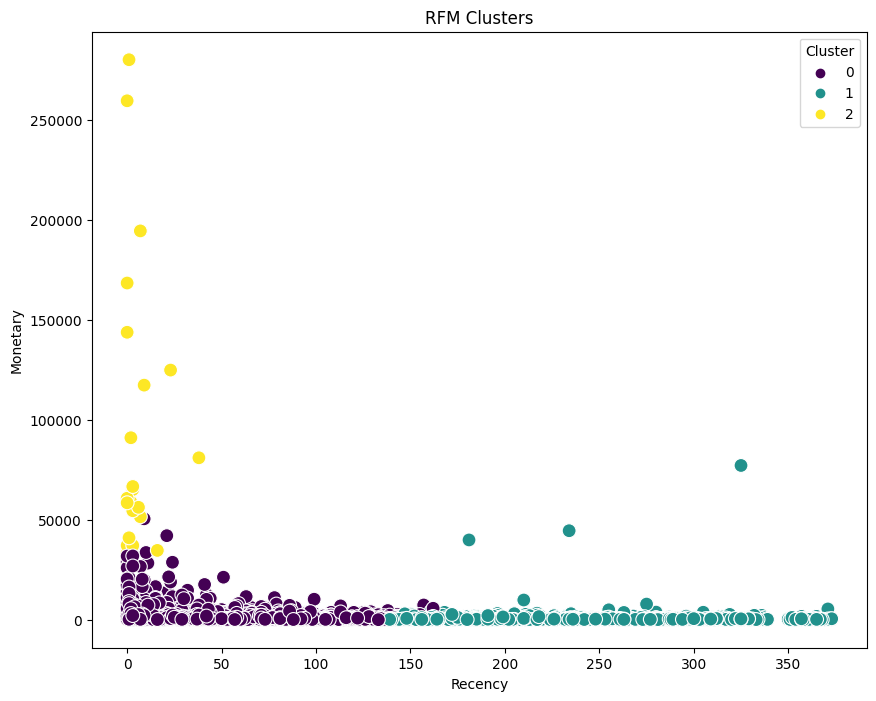

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(rfm_df['Recency'], bins=30, kde=True, color='skyblue')
plt.title('Recency Distribution')


plt.subplot(1, 3, 2)
sns.histplot(rfm_df['Frequency'], bins=30, kde=True, color='salmon')
plt.title('Frequency Distribution')

plt.subplot(1, 3, 3)
sns.histplot(rfm_df['Monetary'], bins=30, kde=True, color='gold')
plt.title('Monetary Distribution')

plt.show()

plt.figure(figsize=(10, 8))
sns.scatterplot(x='Recency', y='Monetary', hue='Cluster', data=rfm_df, palette='viridis', s=100)
plt.title('RFM Clusters')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.legend(title='Cluster')
plt.show()


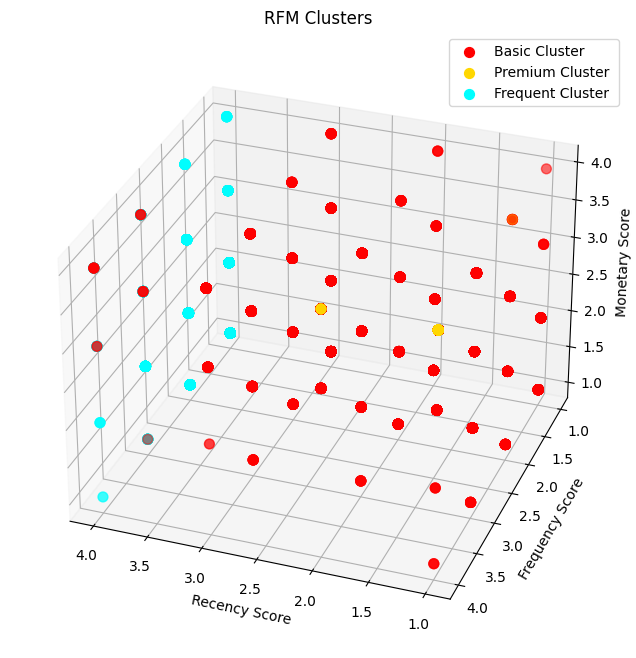

In [ ]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

colors = {'Basic': 'red', 'Premium': 'gold', 'Frequent': 'cyan'}

for cluster, color in colors.items():
    cluster_data = rfm_df[rfm_df['ClusterName'] == cluster]
    ax.scatter(cluster_data['RecencyScore'], cluster_data['FrequencyScore'], cluster_data['MonetaryScore'],
               c=color, label=f'{cluster} Cluster ', s=50)

ax.set_xlabel('Recency Score')
ax.set_ylabel('Frequency Score')
ax.set_zlabel('Monetary Score')
ax.set_title('RFM Clusters')

ax.legend()
ax.view_init(elev=30, azim=110)
ax.grid(True, color='white')

plt.show()


In [ ]:
import plotly.express as px

# Assuming rfm_df is a DataFrame with the mentioned columns, including 'Cluster'

# Assign colors to clusters for better visibility
colors = {'Basic': 'red', 'Premium': 'gold', 'Frequent': 'cyan'}

# Create a 3D scatter plot with Plotly
fig = px.scatter_3d(
    rfm_df,
    x='RecencyScore',
    y='FrequencyScore',
    z='MonetaryScore',
    color='ClusterName',
    color_discrete_map=colors,
    symbol='Cluster',
    opacity=0.7,
    size_max=10,
    labels={'RecencyScore': 'Recency Score', 'FrequencyScore': 'Frequency Score', 'MonetaryScore': 'Monetary Score'},
    title='RFM Clusters'
)

# Set the layout
fig.update_layout(scene=dict(aspectmode='cube'))

# Show the plot
fig.show()


#1. Data Overview

In [ ]:
#1.1. Size of the dataset (number of rows and columns)
rows, columns = df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

print('\n\n')

#1.2. Brief description of each column
column_descriptions = df.dtypes
print("\nColumn Descriptions:")
print(column_descriptions)

print('\n\n')

#1.3. Time period covered by the dataset
min_date = df['InvoiceDate'].min()
max_date = df['InvoiceDate'].max()
time_period = max_date - min_date
print(f"\nTime period covered by the dataset:")
print(f"Start date: {min_date}")
print(f"End date: {max_date}")
print("Time Period Covered:", time_period)

Number of rows: 541909
Number of columns: 18




Column Descriptions:
InvoiceNo                  object
StockCode                  object
Description                object
Quantity                    int64
InvoiceDate        datetime64[ns]
UnitPrice                 float64
CustomerID                float64
Country                    object
InvoiceDate1       datetime64[ns]
EffectivePrice            float64
TotalPrice                float64
TotalRevenue              float64
DayOfWeek                  object
HourOfDay                   int64
Month                       int64
Season                     object
TotalOrderValue           float64
Payment Method             object
dtype: object




Time period covered by the dataset:
Start date: 2010-12-01 08:26:00
End date: 2011-12-09 12:50:00
Time Period Covered: 373 days 04:24:00


#2. Customer Analysis

Number of unique customers is 4339



CustomerID
12346     1
12347     7
12348     4
12349     1
12350     1
         ..
18280     1
18281     1
18282     2
18283    16
18287     3
Name: InvoiceNo, Length: 4339, dtype: int64


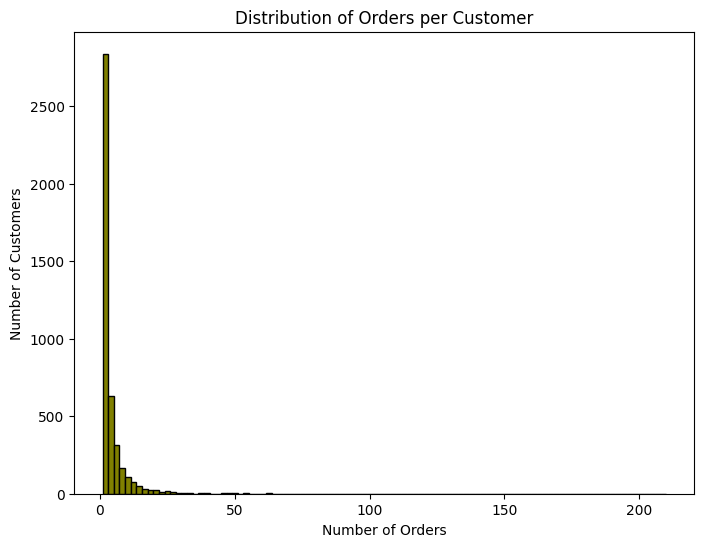

In [ ]:
#2.1 How many unique customers are there in the dataset?
unique_customers = df['CustomerID'].nunique()
print("Number of unique customers is", unique_customers)

print('\n\n')

#2.2 What is the distribution of the number of orders per customer?
orders_per_customer = df.groupby('CustomerID')['InvoiceNo'].nunique()


print(orders_per_customer)
plt.figure(figsize=(8, 6))
plt.hist(orders_per_customer, bins=100, color='olive', edgecolor='black')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.title('Distribution of Orders per Customer')
plt.show()

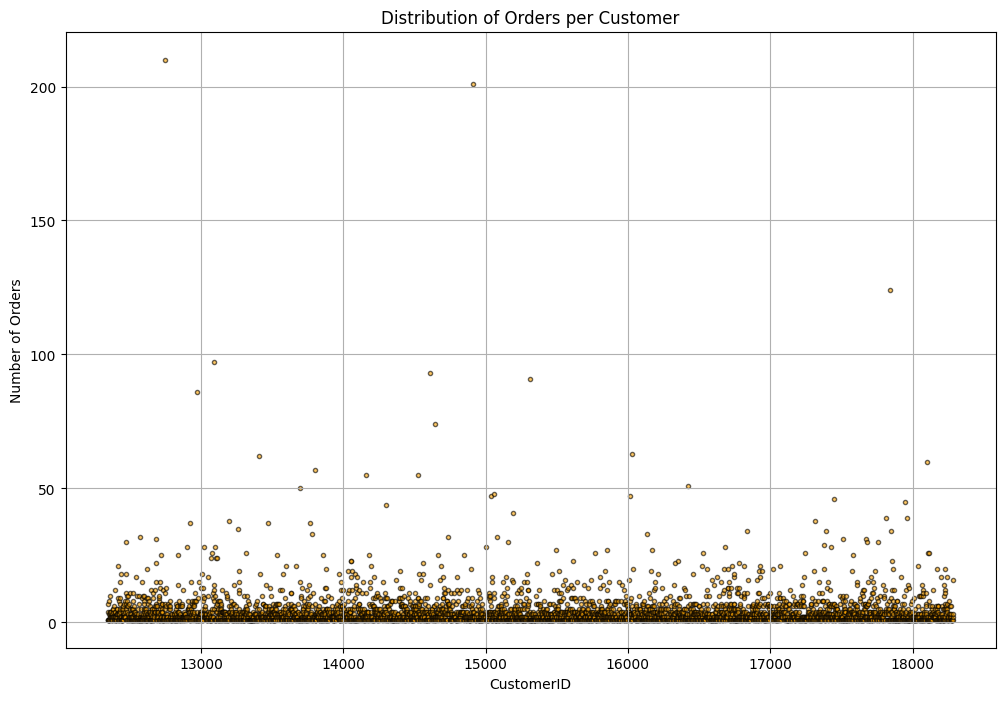

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(orders_per_customer.index, orders_per_customer.values, marker='.', color='orange', edgecolor='black', alpha=0.6)

plt.xlabel('CustomerID')
plt.ylabel('Number of Orders')
plt.title('Distribution of Orders per Customer')
plt.grid(True)
plt.show()


In [ ]:
#2.3 Can you identify the top 5 customers who have made the most purchases by order count?

orders_per_customer = df.groupby('CustomerID')['InvoiceNo'].nunique()
top_customers = orders_per_customer.sort_values(ascending=False).head(5)
print("Top 5 Customers with the Most Purchases by Order Count:")

top_customers

Top 5 Customers with the Most Purchases by Order Count:


CustomerID
12748    210
14911    201
17841    124
13089     97
14606     93
Name: InvoiceNo, dtype: int64

#3. Product Analysis

In [ ]:
# 3.1 What are the top 10 most frequently purchased products?

frequent_products = df.groupby('Description')['Quantity'].sum()
top_10_products = frequent_products.sort_values(ascending=False).head(10)
top_10_products_df = pd.DataFrame({'Description': top_10_products.index, 'TotalQuantity': top_10_products.values})
print("Top 10 Most Frequently Purchased Products:")
print(top_10_products_df)

Top 10 Most Frequently Purchased Products:
                          Description  TotalQuantity
0         PAPER CRAFT , LITTLE BIRDIE          80995
1      MEDIUM CERAMIC TOP STORAGE JAR          77916
2   WORLD WAR 2 GLIDERS ASSTD DESIGNS          54415
3             JUMBO BAG RED RETROSPOT          46181
4  WHITE HANGING HEART T-LIGHT HOLDER          36725
5       ASSORTED COLOUR BIRD ORNAMENT          35362
6     PACK OF 72 RETROSPOT CAKE CASES          33693
7                      POPCORN HOLDER          30931
8                  RABBIT NIGHT LIGHT          27202
9             MINI PAINT SET VINTAGE           26076


In [ ]:
#3.2 What is the average price of products in the dataset?

average_price = df['UnitPrice'].mean()
print("Average price of products:", average_price)

Average price of products: 3.1161744805540756


In [ ]:
#3.3 Can you find out which product category generates the highest revenue?

df['TotalRevenue'] = df['Quantity'] * df['UnitPrice']
product_revenue = df.groupby('Description')['TotalRevenue'].sum()
highest_revenue_product = product_revenue.idxmax()
highest_revenue_value = product_revenue.max()

print(f"The product '{highest_revenue_product}' generates the highest revenue with a total of {highest_revenue_value:.2f} $")

The product 'PAPER CRAFT , LITTLE BIRDIE' generates the highest revenue with a total of 168469.60 $


# 4. Time Analysis

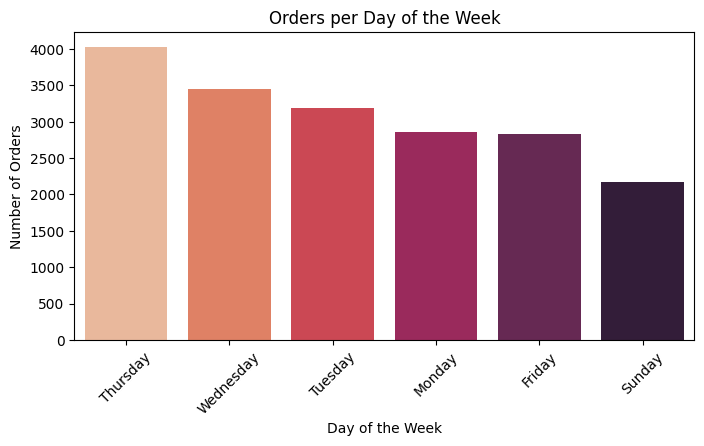

In [ ]:
#4.1 Is there a specific day of the week or time of day when most orders are placed?

orders_df['InvoiceDate'] = pd.to_datetime(orders_df['InvoiceDate'])
orders_df['DayOfWeek'] = orders_df['InvoiceDate'].dt.day_name()
orders_df['HourOfDay'] = orders_df['InvoiceDate'].dt.hour

orders_per_day = orders_df['DayOfWeek'].value_counts()
orders_per_hour = orders_df['HourOfDay'].value_counts()
plt.figure(figsize=(8,4))

sns.barplot(x=orders_per_day.index, y=orders_per_day.values, palette='rocket_r')
plt.title('Orders per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()



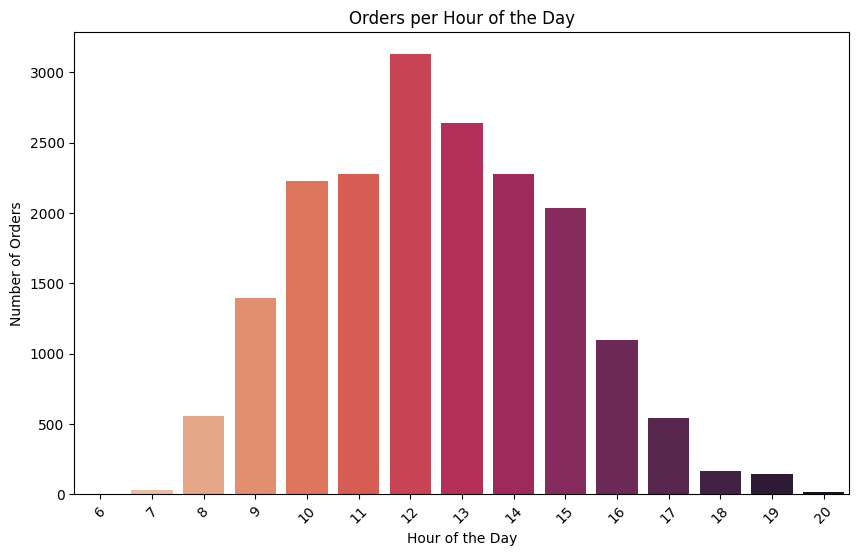

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=orders_per_hour.index, y=orders_per_hour.values, palette='rocket_r')
plt.title('Orders per Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

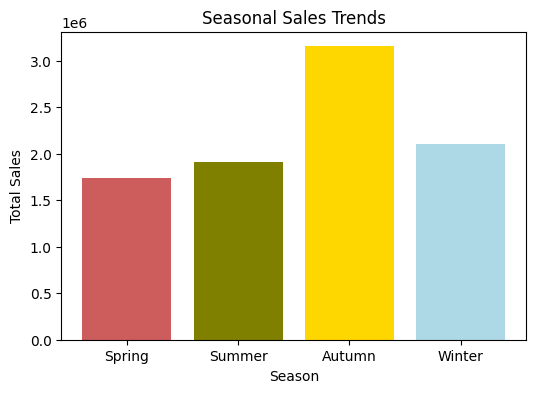

In [ ]:

#4.3 Are there any seasonal trends in the dataset?

orders_df['Month'] = orders_df['InvoiceDate'].dt.month

seasons = {
    1: 'Winter', 2: 'Winter', 3: 'Spring',
    4: 'Spring', 5: 'Spring', 6: 'Summer',
    7: 'Summer', 8: 'Summer', 9: 'Autumn',
    10: 'Autumn', 11: 'Autumn', 12: 'Winter'
}

orders_df['Season'] = orders_df['Month'].map(seasons)
seasonal_sales = orders_df.groupby('Season')['EffectivePrice'].sum()
plt.figure(figsize=(6,4))
seasonal_sales = seasonal_sales.reindex(['Spring', 'Summer', 'Autumn', 'Winter'])
plt.bar(seasonal_sales.index, seasonal_sales.values, color=['indianred', 'olive', 'gold', 'lightblue'])
plt.title('Seasonal Sales Trends')
plt.xlabel('Season')
plt.ylabel('Total Sales')
plt.show()



Month
January       569445.040
February      447137.350
March         595500.760
April         469200.361
May           678594.560
June          661213.690
July          600091.011
August        645343.900
September     952838.382
October      1039318.790
November     1161817.380
December     1090906.680
Name: EffectivePrice, dtype: float64


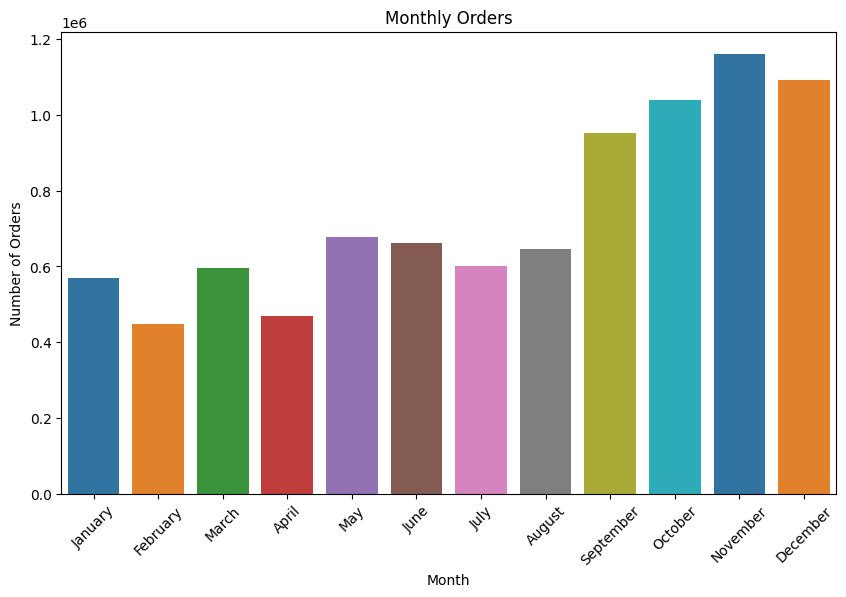

In [ ]:

df['Month'] = df['InvoiceDate'].dt.strftime('%B')
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

monthly_sales = df.groupby('Month')['EffectivePrice'].sum()
df_reset = df.reset_index(drop=True)
print(monthly_sales)

plt.figure(figsize=(10,6))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette='tab10')
plt.title('Monthly Orders')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

# 5. Geographical Analysis

In [ ]:
#5.1 Can you determine the top 5 countries with the highest number of orders?

top_countries = orders_df['Country'].value_counts().head(5)
print(top_countries)

United Kingdom    16649
Germany             457
France              389
EIRE                260
Belgium              98
Name: Country, dtype: int64


In [ ]:
#5.2 Is there a correlation between the country of the customer and the average order value?

country_order_values = orders_df.groupby('Country')['EffectivePrice'].sum()
orders_per_country = orders_df.groupby('Country')['InvoiceNo'].nunique()
average_order_value = country_order_values / orders_per_country

result_df = pd.DataFrame({'Country': average_order_value.index, 'AverageOrderValue': average_order_value.values})
print(result_df)





                 Country  AverageOrderValue
0              Australia        2430.198421
1                Austria         599.922353
2                Bahrain         274.200000
3                Belgium         420.370816
4                 Brazil        1143.600000
5                 Canada         611.063333
6        Channel Islands         786.555385
7                 Cyprus         849.398750
8         Czech Republic         413.370000
9                Denmark        1053.074444
10                  EIRE        1021.330385
11    European Community         325.062500
12               Finland         549.904390
13                France         537.336889
14               Germany         500.803370
15                Greece         952.104000
16               Iceland         615.714286
17                Israel        1444.338000
18                 Italy         460.085263
19                 Japan        1969.282632
20               Lebanon        1693.880000
21             Lithuania        

In [ ]:
correlation = average_order_value.corr(orders_per_country)
print(f"Correlation between Country and Average Order Value: {correlation}")
print('This value indicates a weak negative correlation')


Correlation between Country and Average Order Value: -0.11627391172320647
This value indicates a weak negative correlation


#6. Payment Analysis

Random Weights: [0.02945616 0.04617559 0.76378222 0.16058603]
Sum of Weights: 1.0



Most common payment methods used by customers is Bank Transfer





Text(0.5, 1.0, 'Payment Methods for Orders Placed')

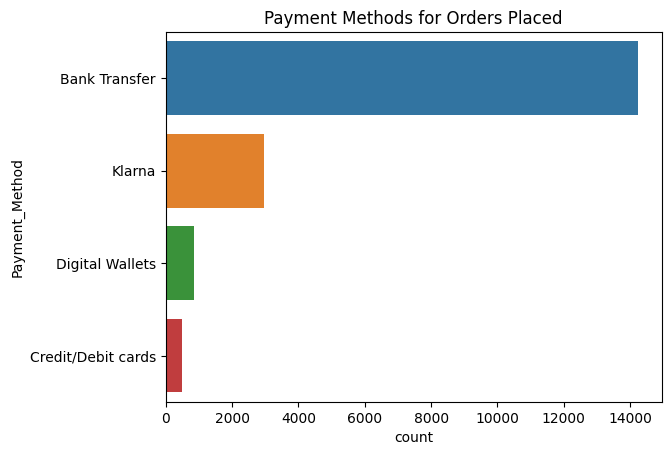

In [ ]:
#6.1What are the most common payment methods used by customers?
import random



weights_ran = np.random.dirichlet(np.ones(4), size=1)[0]

print("Random Weights:", weights_ran)
print("Sum of Weights:", sum(weights_ran))

print('\n\n')

payment_methods = ["Credit/Debit cards", "Digital Wallets", "Bank Transfer", "Klarna"]
orders_df['Payment_Method'] = pd.Series(random.choices(payment_methods, weights=weights_ran, k=len(orders_df)), name='Payment_Method')
print(f"Most common payment methods used by customers is {orders_df['Payment_Method'].value_counts().idxmax()}")
print('\n\n')

sns.countplot(data=orders_df, y='Payment_Method')
plt.title('Payment Methods for Orders Placed')

       Payment_Method  Sales_per_Payment_Method
0       Bank Transfer               6672645.913
1  Credit/Debit cards                235967.360
2     Digital Wallets                425151.990
3              Klarna               1577642.641


<Figure size 1800x600 with 0 Axes>

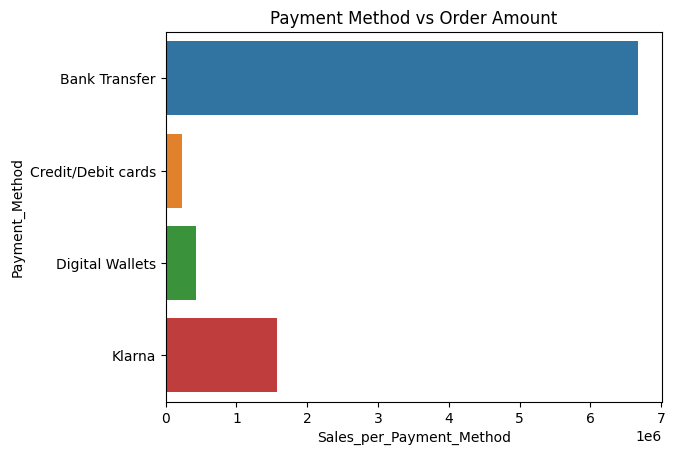

In [ ]:
payment_df = orders_df.groupby('Payment_Method')['EffectivePrice'].sum().reset_index(name='Sales_per_Payment_Method')

print(payment_df)
plt.figure(figsize=(18, 6))
fig, ax = plt.subplots()
sns.barplot(data=payment_df, y='Payment_Method', x='Sales_per_Payment_Method', ax=ax)

plt.title('Payment Method vs Order Amount')
plt.show()

In [ ]:
payment_df['Payment_Method'] = payment_df['Payment_Method'].astype('category').cat.codes

correlation = payment_df['Payment_Method'].corr(payment_df['Sales_per_Payment_Method'])

print(f"Correlation between Payment Method and Order Amount: {correlation}")
print('This strong negative correlation suggests that there is a significant relationship between the payment method and the order amount')

Correlation between Payment Method and Order Amount: -0.6449052733694569
This strong negative correlation suggests that there is a significant relationship between the payment method and the order amount


# 7. Customer Behavior

                           min                 max  Lifespan
CustomerID                                                  
12347      2010-12-07 14:57:00 2011-12-07 15:52:00       365
12348      2010-12-16 19:09:00 2011-09-25 13:13:00       282
12352      2011-02-16 12:33:00 2011-11-03 14:37:00       260
12356      2011-01-18 09:50:00 2011-11-17 08:40:00       302
12358      2011-07-12 10:04:00 2011-12-08 10:26:00       149
...                        ...                 ...       ...
18272      2011-04-07 09:35:00 2011-12-07 12:43:00       244
18273      2011-03-27 11:22:00 2011-12-07 13:16:00       255
18282      2011-08-05 13:35:00 2011-12-02 11:43:00       118
18283      2011-01-06 14:14:00 2011-12-06 12:02:00       333
18287      2011-05-22 10:39:00 2011-10-28 09:29:00       158

[2783 rows x 3 columns]





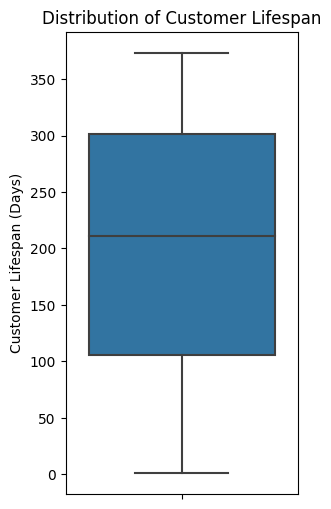




Average Customer Lifespan is 203.34 days


In [ ]:
#7.1 How long, on average, do customers remain active (between their first and last purchase)?

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
customer_lifespan = df.groupby('CustomerID')['InvoiceDate'].agg(['min', 'max'])
customer_lifespan['Lifespan'] = (customer_lifespan['max'] - customer_lifespan['min']).dt.days
customer_lifespan = customer_lifespan[customer_lifespan['Lifespan'] != 0]


print(customer_lifespan)

print('\n\n')

plt.figure(figsize=(3,6))
sns.boxplot(y=customer_lifespan['Lifespan'])
plt.title('Distribution of Customer Lifespan')
plt.ylabel('Customer Lifespan (Days)')
plt.show()

average_lifespan = customer_lifespan['Lifespan'].mean()

print('\n\n')

print(f"Average Customer Lifespan is {average_lifespan:.2f} days")

In [ ]:
#7.2 Are there any customer segments based on their purchase behaviour?



Certainly! In our specific dataset, we have identified three customer segments based on their purchase behavior:

1. **Basic Segment:**
   - These customers have made purchases with moderate recency, frequency, and monetary values.
   - Recommendations: Engage with personalized promotions to encourage more frequent purchases and enhance loyalty.

2. **Frequent Segment:**
   - Customers in this segment exhibit high frequency and recency, indicating regular and recent purchases.
   - Recommendations: Reward loyalty with exclusive offers, loyalty programs, or early access to new products to maintain their engagement.

3. **Premium Segment:**
   - This segment comprises customers with high recency, frequency, and monetary values, suggesting significant spending.
   - Recommendations: Provide premium services, personalized recommendations, and exclusive perks to maximize their spending and enhance their overall experience.



#8. Returns and Refunds


In [ ]:
#8.1 What is the percentage of orders that have experienced returns or refunds?

Returns = ['Returned', 'Not Returned']
x=round(random.uniform(0.1, 0.3), 2)

weights_1 = [x, 1-x]

df['Returns'] = np.random.choice(Returns, size=len(df), p=weights_1)

total_orders = df.shape[0]
returned_orders = df[df['Returns'] == 'Returned'].shape[0]

percentage_returns = (returned_orders / total_orders) * 100
print(f"Percentage of orders with returns or refunds: {percentage_returns:.2f}%")
print('\n\n')
df[['InvoiceNo', 'Description', 'Returns']].head(10)

Percentage of orders with returns or refunds: 26.99%





,InvoiceNo,Description,Returns
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,Returned
1,536365,WHITE METAL LANTERN,Returned
2,536365,CREAM CUPID HEARTS COAT HANGER,Not Returned
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,Not Returned
4,536365,RED WOOLLY HOTTIE WHITE HEART.,Returned
5,536365,SET 7 BABUSHKA NESTING BOXES,Not Returned
6,536365,GLASS STAR FROSTED T-LIGHT HOLDER,Not Returned
7,536366,HAND WARMER UNION JACK,Not Returned
8,536366,HAND WARMER RED POLKA DOT,Not Returned
9,536367,ASSORTED COLOUR BIRD ORNAMENT,Not Returned


In [ ]:
descriptions = df['Description'].astype(str)

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(descriptions)

num_clusters = 100
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Category'] = kmeans.fit_predict(X)

feature_names = vectorizer.get_feature_names_out()

top_terms_per_cluster = {}
for i in range(num_clusters):
    cluster_center = kmeans.cluster_centers_[i]
    top_term_indices = cluster_center.argsort()[-1:][::-1]
    top_terms = [feature_names[idx] for idx in top_term_indices]
    top_terms_per_cluster[f'{i}'] = top_terms

for category, top_terms in top_terms_per_cluster.items():
    print(f'{category}: {", ".join(top_terms)}')

df[['Description','Category']].head(20)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0: wood
1: tea
2: recycling
3: cream
4: water
5: lunch
6: home
7: mini
8: 60
9: 12
10: glass
11: bag
12: feltcraft
13: jumbo
14: alarm
15: slate
16: rose
17: confusing
18: ceramic
19: circus
20: mug
21: table
22: jar
23: small
24: light
25: childrens
26: frame
27: assorted
28: plasters
29: sewing
30: bunting
31: wrap
32: box
33: trinket
34: scales
35: candles
36: bunting
37: reel
38: making
39: matches
40: knob
41: heart
42: warmer
43: dolly
44: chocolate
45: regency
46: carry
47: boxes
48: key
49: tins
50: chain
51: parasol
52: paisley
53: playhouse
54: charlotte
55: sign
56: cookie
57: wallet
58: art
59: game
60: large
61: cakestand
62: bread
63: christmas
64: tin
65: retrospot
66: tins
67: recipe
68: cutlery
69: set
70: lights
71: teacup
72: enamel
73: night
74: 20
75: marker
76: pencils
77: doll
78: boxes
79: milk
80: doily
81: decoration
82: garden
83: clock
84: tree
85: egg
86: postage
87: gardeners
88: vintage
89: hook
90: painted
91: cases
92: card
93: polkadot
94: traditional


,Description,Category
0,WHITE HANGING HEART T-LIGHT HOLDER,24
1,WHITE METAL LANTERN,55
2,CREAM CUPID HEARTS COAT HANGER,3
3,KNITTED UNION FLAG HOT WATER BOTTLE,4
4,RED WOOLLY HOTTIE WHITE HEART.,41
5,SET 7 BABUSHKA NESTING BOXES,78
6,GLASS STAR FROSTED T-LIGHT HOLDER,10
7,HAND WARMER UNION JACK,42
8,HAND WARMER RED POLKA DOT,42
9,ASSORTED COLOUR BIRD ORNAMENT,27


In [ ]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['Category'], df['Returns'])

chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"Chi-squared value: {chi2:.4}")
print(f"P-value: {p:.2}")


if p < 0.05:
    print("There is a significant correlation between product category and returns")
else:
    print("There is no significant correlation between product category and returns")


Chi-squared value: 103.3
P-value: 0.36
There is no significant correlation between product category and returns


# 9. Profitability Analysis

In [ ]:
#9.1 Can you calculate the total profit generated by the company during the dataset's time period?

df['Profit'] = df['EffectivePrice'] * (np.random.uniform(-0.1, 0.3, len(df)))
df[['Description', 'EffectivePrice','Profit']].head()

,Description,EffectivePrice,Profit
0,WHITE HANGING HEART T-LIGHT HOLDER,15.30,-0.256726
1,WHITE METAL LANTERN,20.34,1.224596
2,CREAM CUPID HEARTS COAT HANGER,22.00,-1.989319
3,KNITTED UNION FLAG HOT WATER BOTTLE,20.34,3.549851
4,RED WOOLLY HOTTIE WHITE HEART.,20.34,-0.138682


In [ ]:
profit_total = df['Profit'].sum()
total_revenue = df['EffectivePrice'].sum()
print(f"Total Profit generated is {profit_total:.2f} ")
print(f"Profit Percentage is {((profit_total/total_revenue)*100):.2f}% " )

Total Profit generated is 926225.91 
Profit Percentage is 10.39% 


In [ ]:
#9.2 What are the top 5 products with the highest profit margins

df_product = df.groupby('Description').agg({
    'UnitPrice': 'mean',
    'EffectivePrice': 'sum',
    'Profit': 'sum'
}).reset_index()

df_product.columns = ['Product', 'Avg_UnitPrice', 'Total_Revenue', 'Total_Profit']
df_product['Profit_Margin'] = (df_product['Total_Profit']/df_product['Total_Revenue'])*100
df_product.sort_values(by='Profit_Margin', ascending=False, inplace=True)
df_product.head(5)

print('Top 5 products with the highest profit margins are')
print(df_product['Product'].head(5))



Top 5 products with the highest profit margins are
2466         PINK FLOCK PHOTO FRAME 
2657                    RAIN PONCHO 
3523    UNION JACK HOT WATER BOTTLE 
3866           ZINC PLANT POT HOLDER
2512     PINK PAINTED KASHMIRI CHAIR
Name: Product, dtype: object


# 10. Customer Satisfaction

In [ ]:
#10.1 Is there any data available on customer feedback or ratings for products or services?

df['Customer_Satisfaction'] = np.random.randint(1, 6, len(df))

feedback_options = [
    "Absolutely thrilled with the product!",
    "The product is fantastic, exceeded all expectations.",
    "I'm so happy with my purchase!",
    "Incredible quality, worth every penny.",
    "Best product I've ever bought!",
    "Perfect product, couldn't ask for more.",
    "Extremely satisfied with the product.",
    "Wonderful design and functionality.",
    "Impressed with the top-notch quality.",
    "Exactly what I needed, highly recommend!",
    "The product is good, met my expectations.",
    "Satisfied with the purchase, no complaints.",
    "Decent product for the price.",
    "Average product, neither good nor bad.",
    "Product quality is okay, not exceptional.",
    "Met expectations, but nothing special.",
    "Not bad, but there are better options.",
    "Disappointed with the product.",
    "Expected better quality for the price.",
    "Product did not meet my expectations.",
    "Regret buying this product.",
    "Poor quality, would not recommend.",
    "Waste of money, extremely dissatisfied.",
    "Product arrived damaged, very upset.",
    "Terrible product, would give zero stars if possible.",
    "Avoid this product, complete disappointment.",
    "Absolutely awful, worst purchase ever.",
    "Hugely disappointed with the product.",
    "The product is a letdown, not as described.",
    "Extremely negative experience with this product.",
    "Do not buy, total waste of money.",
    "Worst quality product I've ever received.",
    "Faulty product, won't buy from this brand again.",
    "Unusable product, complete waste of resources."
]

df['Customer_Feedback'] = np.random.choice(feedback_options, size=len(df))

df[['CustomerID','Description', 'Customer_Satisfaction', 'Customer_Feedback']].head()



,CustomerID,Description,Customer_Satisfaction,Customer_Feedback
0,17850,WHITE HANGING HEART T-LIGHT HOLDER,1,"Faulty product, won't buy from this brand again."
1,17850,WHITE METAL LANTERN,5,"Faulty product, won't buy from this brand again."
2,17850,CREAM CUPID HEARTS COAT HANGER,3,I'm so happy with my purchase!
3,17850,KNITTED UNION FLAG HOT WATER BOTTLE,2,Disappointed with the product.
4,17850,RED WOOLLY HOTTIE WHITE HEART.,4,"Perfect product, couldn't ask for more."


In [ ]:
customer_satisfaction = df.groupby('Description')['Customer_Satisfaction'].mean().reset_index()
customer_satisfaction.columns = ["Product", "Average_Product_Customer_Satisfaction"]
customer_satisfaction.head()

,Product,Average_Product_Customer_Satisfaction
0,4 PURPLE FLOCK DINNER CANDLES,2.820513
1,50'S CHRISTMAS GIFT BAG LARGE,2.889908
2,DOLLY GIRL BEAKER,3.072464
3,I LOVE LONDON MINI BACKPACK,3.185714
4,I LOVE LONDON MINI RUCKSACK,1.000000


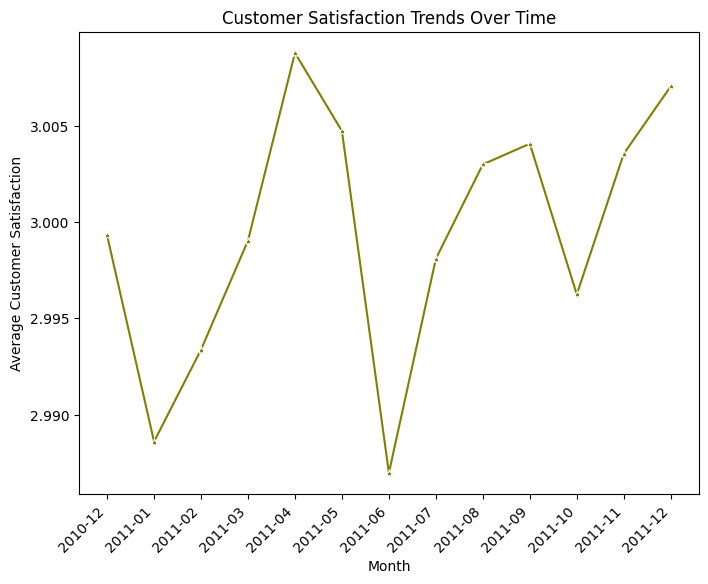

In [ ]:
#10.2 Can you analyze the sentiment or feedback trends, if available?

satisfaction_trends = df.groupby(df['InvoiceDate'].dt.to_period("M"))['Customer_Satisfaction'].mean()
plt.figure(figsize=(8, 6))
sns.lineplot(x=satisfaction_trends.index.astype(str), y=satisfaction_trends.values, marker='*', color='olive')
plt.title('Customer Satisfaction Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Average Customer Satisfaction')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
!pip install nltk
import nltk

nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer


sia = SentimentIntensityAnalyzer()

df['Sentiment_Score'] = df['Customer_Feedback'].apply(lambda x: sia.polarity_scores(x)['compound'])

df['Sentiment_Label'] = pd.cut(df['Sentiment_Score'], bins=[-1, -0.1, 0.1, 1], labels=['Negative Review', 'Neutral Review', 'Positive Review'])

df[['CustomerID', 'Description', 'Customer_Feedback', 'Sentiment_Score', 'Sentiment_Label']].head()


,CustomerID,Description,Customer_Feedback,Sentiment_Score,Sentiment_Label
0,17850,WHITE HANGING HEART T-LIGHT HOLDER,"Faulty product, won't buy from this brand again.",-0.3182,Negative Review
1,17850,WHITE METAL LANTERN,"Faulty product, won't buy from this brand again.",-0.3182,Negative Review
2,17850,CREAM CUPID HEARTS COAT HANGER,I'm so happy with my purchase!,0.6468,Positive Review
3,17850,KNITTED UNION FLAG HOT WATER BOTTLE,Disappointed with the product.,-0.4767,Negative Review
4,17850,RED WOOLLY HOTTIE WHITE HEART.,"Perfect product, couldn't ask for more.",0.5719,Positive Review


**Trying to analyze overall reviews for each product and finding most frequent review label**

In [ ]:
grouped_df = df.groupby('Description')['Sentiment_Score'].mean().reset_index()
grouped_df = grouped_df.rename(columns={'Sentiment_Score': 'Mean_Sentiment_Score'})

grouped_df['Most_Frequent_Label'] = df.groupby('Description')['Sentiment_Label'].apply(lambda x: x.mode().iloc[0]).reset_index(drop=True)

label_counts = df.groupby(['Description', 'Sentiment_Label']).size().unstack(fill_value=0).reset_index()
grouped_df = pd.merge(grouped_df, label_counts, on='Description')

grouped_df.head(10)


,Description,Mean_Sentiment_Score,Most_Frequent_Label,Negative Review,Neutral Review,Positive Review
0,4 PURPLE FLOCK DINNER CANDLES,0.021721,Positive Review,17,2,20
1,50'S CHRISTMAS GIFT BAG LARGE,-0.052317,Negative Review,57,3,49
2,DOLLY GIRL BEAKER,-0.007680,Positive Review,65,7,66
3,I LOVE LONDON MINI BACKPACK,-0.095667,Negative Review,34,11,25
4,I LOVE LONDON MINI RUCKSACK,0.440400,Positive Review,0,0,1
5,NINE DRAWER OFFICE TIDY,-0.040726,Negative Review,16,1,14
6,OVAL WALL MIRROR DIAMANTE,0.017677,Positive Review,24,5,31
7,RED SPOT GIFT BAG LARGE,-0.061244,Negative Review,44,13,37
8,SET 2 TEA TOWELS I LOVE LONDON,-0.067343,Negative Review,95,21,86
9,SPACEBOY BABY GIFT SET,-0.023737,Positive Review,62,18,63


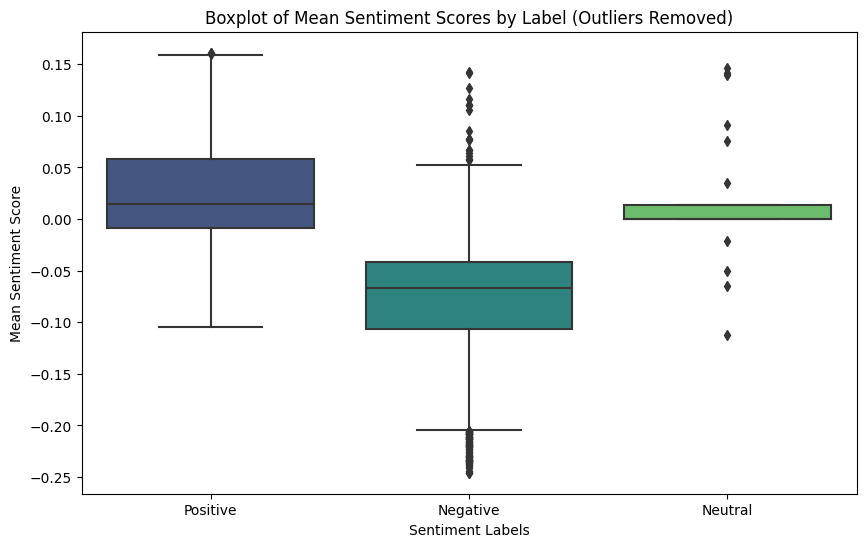

In [ ]:
# Assuming 'grouped_df' is your DataFrame
Q1 = grouped_df['Mean_Sentiment_Score'].quantile(0.25)
Q3 = grouped_df['Mean_Sentiment_Score'].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
filtered_df = grouped_df[(grouped_df['Mean_Sentiment_Score'] >= Q1 - 1.5 * IQR) & (grouped_df['Mean_Sentiment_Score'] <= Q3 + 1.5 * IQR)]

# Plot boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Most_Frequent_Label', y='Mean_Sentiment_Score', data=filtered_df, palette='viridis')
plt.title('Boxplot of Mean Sentiment Scores by Label after removing Outliers )')
plt.xlabel('Sentiment Labels')
plt.ylabel('Mean Sentiment Score')
plt.show()


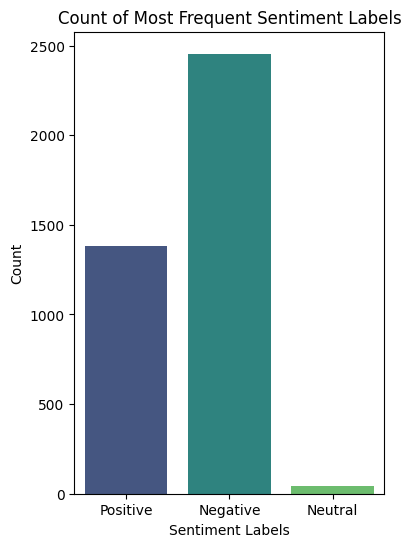

In [ ]:
plt.figure(figsize=(4, 6))
sns.countplot(x='Most_Frequent_Label', data=grouped_df, palette='viridis')
plt.title('Count of Most Frequent Sentiment Labels')
plt.xlabel('Sentiment Labels')
plt.ylabel('Count')
plt.show()
